### Notebook to prepare datasets for use in networks

In [1]:
import os, sys, shutil
import numpy as np
import matplotlib.pyplot as plt
import torch 

#### Break into subsections

In [ ]:
'''
Choose subsection size
 - For MURaM, did 128x128, so at 0.0211"/pix thats ~2.7"^2 per region
 - For these, 0.016"/pix, so 2.7"^2 is ~168x168pix
 - Maybe 170? Although closest potential im_size is 160 so lets do that (just must be divisible by 2, 5 times)
 - With pad=80, thats (4096-160)/160 = 3936/160 = 24.6 -> so I will get 24**2 sections. 
 - But can't do that cause needs to be square
    -- Ehh wait no it doesn't if I rewrite splitting code I will have some leftovers but thats fine
'''

img = fits.open(f'../Data/DKIST_gband_Oct28_series/VBI_46_29_333')[0].data
MuRAM_npy = np.load('../Data/UNetData_MURaM/images/train/000130__3.npy')
MuRAM_TS_npy = np.load('../Data/UNetData_MURaM_TSeries20/000130__2.npy')
DKIST_npy = np.load('../Data/UNetData_v2/images/train/VBI_00_12__0.npy')
fig, axs = plt.subplots(2,3, figsize=(12, 7))
axs[0,0].imshow(MuRAM_npy); axs[0,0].set_title(f'MURaM {np.shape(MuRAM_npy)} -> {np.shape(MuRAM_npy)[0]*0.0211}^2"')
axs[0,1].imshow(MuRAM_TS_npy); axs[0,1].set_title(f'MURaM TS {np.shape(MuRAM_TS_npy)} -> {np.shape(MuRAM_TS_npy)[0]*0.0211 }^2"')
axs[0,2].imshow(DKIST_npy); axs[0,2].set_title(f'DKIST {np.shape(DKIST_npy)} -> {np.shape(DKIST_npy)[0]*0.016}^2"')
s = [160, 170, 190]
for i in range(len(s)):
    axs[1,i].imshow(img[50:50+s[i],50:50+s[i]]); axs[1,i].set_title(f'{s[i]}x{s[i]} ({s[i]*0.016}^2")')

In [ ]:
'''
Break (jun 16) up images and segimages
Note that these images are much bigger, so break into 30**2 pieces not 15**2
'''
dir = "../Data/All_DKIST/"
imgoutdir = "../Data/UNetData_v2/images/"
segoutdir = "../Data/UNetData_v2/seg_images/" 
badtags = ['31_21', '33_13', '04_29', '17_20', '24_26']
files = [filename for filename in os.listdir(dir) if filename.startswith('VBI') and filename.endswith('_4096') and not any(tag in filename for tag in badtags)] 
n = 30 # sqrt of num pieces to break each image and seg image into
for file in files:
    print(file)
    tag = file[file.find('VBI'):-5]
    if os.path.exists(f'{imgoutdir}{tag}__224.npy'):
        # print(f'{imgoutdir}{tag}__224.npy exists')
        print(f'\tSubsections already saved')
    else:
        print(f'\tSaving subsections')
        data = fits.open(dir+file)[1].data
        print(dir+file)
        plt.figure(); plt.imshow(data, origin='lower')
        pad = int(np.shape(data)[0]/200)
        data = data[pad:-pad, pad:-pad]    ### NOTE: HANG ON DID I NOT HAVE THIS COMMENTED WHEN I RAN BEFORE?? WHY??
        segdata = np.squeeze(fits.open(dir+'SEGv2_'+file)[0].data)
        plt.figure(); plt.imshow(segdata[0:450,0:450], origin='lower')
        segdata = segdata[pad:-pad, pad:-pad] 
        plt.figure(); plt.imshow(segdata[0:450,0:450], origin='lower')
        N = np.min(np.shape(data)) 
        len = int(N/n) 
        num = 0
        for i in range(n):
            for j in range(n):
                name = tag+'__'+str(num); num += 1
                x1 = len * i
                x2 = len * (i + 1)
                y1 = len * j
                y2 = len * (j + 1)
                savedata = data[x1:x2, y1:y2]
                saveseg = segdata[x1:x2, y1:y2]
                plt.figure(); plt.imshow(savedata, origin='lower')
                plt.figure(); plt.imshow(saveseg, origin='lower')
                a=b
                np.save(imgoutdir+name, savedata)
                np.save(segoutdir+'SEG_'+name, saveseg) 

'''
Seperate into train and test folders 
'''
# imgdir = "../Data/UNetData_v2/images/"
# segdir = "../Data/UNetData_v2/seg_images/"
# imgfiles = [file for file in os.listdir(imgdir) if '.npy' in file]
# for imgfile in imgfiles:
#     label = imgfile[:-4]
#     segfile = [filename for filename in os.listdir(segdir) if label in filename][0]
#     folder = 'train' if np.random.rand(1)[0] < 0.7 else 'val'
#     shutil.move(imgdir+imgfile, imgdir+folder+'/'+imgfile)
#     shutil.move(segdir+segfile, segdir+folder+'/'+segfile)

'''
Check that npy files look ok
'''
# trainimgdir = "../Data/UNetData_v2/images/train/"
# trainsegdir = "../Data/UNetData_v2/seg_images/train/"
# trainimgs = os.listdir(trainimgdir)
# trainsegs = os.listdir(trainsegdir)
# for i in range(5):
#     idx = np.random.randint(0, len(trainimgs))
#     img = np.load(f'{trainimgdir}{trainimgs[idx]}')
#     seg = np.load(f'{trainsegdir}{trainsegs[idx]}')
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     ax1.set_title(f'{trainimgdir}{trainimgs[idx]}')
#     ax1.imshow(img)
#     ax2.imshow(seg)


In [ ]:
'''
Break up MURaM images and segimages
Note that these images are much smaller, so break into 5**2 pieces not 15**2
'''
# dir = "../Data/MURaM/"
# imgoutdir = "../Data/UNetData_MURaM/images/"
# segoutdir = "../Data/UNetData_MURaM/seg_images/" 
# files = [filename for filename in os.listdir(dir) if filename.startswith('SEGv2')] 
# n = 5 # sqrt of num pieces to break each image and seg image into
# for file in files:
#     print(file)
#     tag = file[file.find('I_out')+6: file.find('.fits')]
#     if os.path.exists(f'{imgoutdir}{tag}__{n**2-1}.npy'): # last .npy created from file
#         print(f'{imgoutdir}{tag}__{n**2-1}.npy exists')
#         print(f'\tSubsections already saved')
#     else:
#         print(f'\tSaving subsections')
#         data = fits.open(dir+file)[1].data 
#         segdata = np.squeeze(fits.open(dir+file)[0].data)
#         # Remove zero padding at edges of seg file
#         pad = int(np.shape(data)[0]/200)
#         data = data[pad:-pad, pad:-pad]
#         segdata = segdata[pad:-pad, pad:-pad] 
#         N = np.min(np.shape(data)) 
#         length = int(N/n) 
#         num = 0
#         for i in range(n):
#             for j in range(n):
#                 name = tag+'__'+str(num); num += 1
#                 x1 = length * i
#                 x2 = length * (i + 1)
#                 y1 = length * j
#                 y2 = length * (j + 1)
#                 savedata = data[x1:x2, y1:y2]
#                 saveseg = segdata[x1:x2, y1:y2]
#                 np.save(imgoutdir+name, savedata)
#                 np.save(segoutdir+'SEG_'+name, saveseg) 

'''
Seperate into img and seg folders 
'''
# imgdir = "../Data/UNetData_MURaM/images/"
# segdir = "../Data/UNetData_MURaM/seg_images/"
# imgfiles = [file for file in os.listdir(imgdir) if '.npy' in file]
# for imgfile in imgfiles:
#     label = imgfile[:-4]
#     segfile = [filename for filename in os.listdir(segdir) if label in filename][0]
#     folder = 'train' if np.random.rand(1)[0] < 0.7 else 'val'
#     # print(f'Moving {imgdir+imgfile} to {imgdir+folder}/{imgfile}')
#     # print(f'Moving {segdir+segfile} to {segdir+folder}/{segfile}')
#     shutil.move(imgdir+imgfile, imgdir+folder+'/'+imgfile)
#     shutil.move(segdir+segfile, segdir+folder+'/'+segfile)


'''
Check that npy files look ok
'''
# trainimgdir = "../Data/UNetData_MURaM/images/train/"
# trainsegdir = "../Data/UNetData_MURaM/seg_images/train/"
# trainimgs = os.listdir(trainimgdir)
# print(trainimgs)
# trainsegs = os.listdir(trainsegdir)
# for i in range(5):
#     idx = np.random.randint(0, len(trainimgs))
#     img = np.load(f'{trainimgdir}{trainimgs[idx]}')
#     seg = np.load(f'{trainsegdir}{trainsegs[idx]}')
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     ax1.set_title(f'{trainimgdir}{trainimgs[idx]}')
#     ax1.imshow(img)
#     ax2.imshow(seg)

In [ ]:
'''
Break up images and segimages (5**2 pieces maybe too small - lets do 3**2?)
And then seperate into train and val folders
'''
dir = "../Data/MURaM/"
imgoutdir = "../Data/UNetData_MURaM/images/"
segoutdir = "../Data/UNetData_MURaM/seg_images/" 
files = [filename for filename in os.listdir(dir) if filename.startswith('SEGv2')] 
n = 3 # sqrt of num pieces to break each image and seg image into
for file in files:
    print(file)
    tag = file[file.find('I_out')+6: file.find('.fits')]
    if os.path.exists(f'{imgoutdir}{tag}__{n**2-1}.npy'): # last .npy created from file
        print(f'{imgoutdir}{tag}__{n**2-1}.npy exists')
        print(f'\tSubsections already saved')
    else:
        print(f'\tSaving subsections')
        data = fits.open(dir+file)[1].data 
        segdata = np.squeeze(fits.open(dir+file)[0].data)
        # Remove area of im and seg where seg has zero padding 
        pad = int(np.shape(data)[0]/200)
        data = data[pad:-pad, pad:-pad]
        segdata = segdata[pad:-pad, pad:-pad] 
        N = np.min(np.shape(data)) 
        len = int(N/n) 
        num = 0
        for i in range(n):
            for j in range(n):
                name = tag+'__'+str(num); num += 1
                x1 = len * i
                x2 = len * (i + 1)
                y1 = len * j
                y2 = len * (j + 1)
                savedata = data[x1:x2, y1:y2]
                saveseg = segdata[x1:x2, y1:y2]
                np.save(imgoutdir+name, savedata)
                np.save(segoutdir+'SEG_'+name, saveseg) 

imgdir = "../Data/UNetData_MURaM/images/"
segdir = "../Data/UNetData_MURaM/seg_images/"
imgfiles = [file for file in os.listdir(imgdir) if '.npy' in file]
for imgfile in imgfiles:
    label = imgfile[:-4]
    segfile = [filename for filename in os.listdir(segdir) if label in filename][0]
    folder = 'train' if np.random.rand(1)[0] < 0.7 else 'val'
    # print(f'Moving {imgdir+imgfile} to {imgdir+folder}/{imgfile}')
    # print(f'Moving {segdir+segfile} to {segdir+folder}/{segfile}')
    shutil.move(imgdir+imgfile, imgdir+folder+'/'+imgfile)
    shutil.move(segdir+segfile, segdir+folder+'/'+segfile)

'''
Check that npy files look ok
'''

# print('Total file counts:')
# print(f'\tOriginal MURaM files: {len([filename for filename in os.listdir("../Data/MURaM") if filename.startswith("SEGv2") == False])}')
# print(f'\tTotal number segmented: {len([filename for filename in os.listdir("../Data/MURaM") if filename.startswith("SEGv2")])}')
# print(f'\tTotal number numpy pieces: {len(os.listdir("../Data/UNetData_MURaM/seg_images/train/")) + len(os.listdir("../Data/UNetData_MURaM/seg_images/val/"))}')
# print(f'\tTrain dir has {len(os.listdir("../Data/UNetData_MURaM/images/train/"))} images and {len(os.listdir("../Data/UNetData_MURaM/seg_images/train/"))} segs')
# print(f'\tVal dir has {len(os.listdir("../Data/UNetData_MURaM/images/val/"))} images and {len(os.listdir("../Data/UNetData_MURaM/seg_images/val/"))} segs')

# trainimgdir = "../Data/UNetData_MURaM/images/train/"
# trainsegdir = "../Data/UNetData_MURaM/seg_images/train/"
# trainimgs = os.listdir(trainimgdir)
# trainsegs = os.listdir(trainsegdir)
# for i in range(5):
#     idx = np.random.randint(0, len(trainimgs))
#     img = np.load(f'{trainimgdir}{trainimgs[idx]}')
#     seg = np.load(f'{trainsegdir}{trainsegs[idx]}')
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     ax1.set_title(f'{trainimgs[idx]}')
#     ax1.imshow(img)
#     ax2.imshow(seg)

In [ ]:
'''
MURaM mag data
'''

'''
Could I just cut them up the same way as for the flux series, put them in in "UNetData_[*]/mag_images", so that could access in dataloader just like I get the segs?
Would need to do for non T-series processed UNetData_MURaM, and the two T-series processed ones.
For now, lets focus on the non T-series one. 
'''

dir = '../Data/MURaM_mag/'
# files = [filename for filename in os.listdir(dir) if filename.startswith('tau')]
# magoutdir = '../Data/UNetData_MURaM/mag_images/'
# n = 3 # sqrt of num pieces to break each image into
# for file in files:
#     print(file)
#     tag = file[file.find('slice')+12: file.find('Bz')-1]
#     if os.path.exists(f'{magoutdir}{tag}__{n**2-1}.npy'): # last .npy created from file
#         print(f'{magoutdir}{tag}__{n**2-1}.npy exists')
#         print(f'\tSubsections already saved')
#     else:
#         print(f'\tSaving subsections')
#         magdata = fits.open(dir+file)[0].data 
#         # Remove zero padding at edges of seg file
#         pad = int(np.shape(magdata)[0]/200)
#         magdata = magdata[pad:-pad, pad:-pad]
#         N = np.min(np.shape(magdata)) 
#         length = int(N/n) 
#         num = 0
#         for i in range(n):
#             for j in range(n):
#                 name = tag+'__'+str(num); num += 1
#                 x1 = length * i
#                 x2 = length * (i + 1)
#                 y1 = length * j
#                 y2 = length * (j + 1)
#                 savemag = magdata[x1:x2, y1:y2]
#                 np.save(magoutdir+name, savemag)

'''
Seperate into train and test folders 
Oh wait but recall when I made UNetData_MURaM I had only segmented a subset of the files
And I did the rest to make the TSeries data, but didn't add them to the UNetData_MURaM/[images, seg_images]/[train,test] dataset
So if I want to use all of them for mag data, would need to train/test split the new UNetData_MURaM/* ones first (the one still in /images/)
But amount of training data seemed ok - wasn't imporving much with more data
So lets just add mags for the ones we already were using - leave the rest outside analogously 
'''

magdir = "../Data/UNetData_MURaM/mag_images/"
imgdir = "../Data/UNetData_MURaM/images/" # for checking which folder it should go in
magfiles = [file for file in os.listdir(magdir) if '.npy' in file]
for magfile in magfiles:
    imgfile = magfile # names are the same (xxxxx__x.npy)
    if os.path.exists(f'{imgdir}train/{imgfile}'): 
        shutil.move(magdir+magfile, magdir+'train/'+magfile)
    elif os.path.exists(f'{imgdir}val/{imgfile}'):
        shutil.move(magdir+magfile, magdir+'val/'+magfile)

#### Timeseries sets

In [ ]:
'''
Break up images and segimages
'''
imgdir = "../Data/UNetData_DKIST_TSeries/images/"
segdir = "../Data/UNetData_DKIST_TSeries/seg_images/" 
files = [filename for filename in os.listdir(dir) if filename.startswith('SEGv2')] # and not any(tag in filename for tag in bad) 
length = 160
n_regions = int(np.floor((np.shape(fits.open(f'../Data/DKIST_gband_Oct28_series/VBI_46_29_333')[0].data)[0]-2*pad)/length))**2
# if os.path.exists(imgdir) == False: os.mkdir(imgdir)
# if os.path.exists(segdir) == False: os.mkdir(segdir)
# for file in files:
#     print(file)
#     tag = file[file.find('VBI'):]
#     if os.path.exists(f'{imgdir}{tag}__{n_regions}.npy'): # last .npy created from file
#         print(f'{imgdir}{tag}__{n_regions}.npy exists')
#         print(f'\tSubsections already saved')
#     else:
#         print(f'\tSaving subsections')
#         data = fits.open(dir+file)[1].data 
#         segdata = np.squeeze(fits.open(dir+file)[0].data)
#         # Remove zero padding at edges of seg file
#         data = data[pad:-pad, pad:-pad]
#         segdata = segdata[pad:-pad, pad:-pad] 
#         # N = np.min(np.shape(data)) 
#         # length = int(N/n) 
#         num = 0
#         for i in range(int(np.sqrt(n_regions))):
#             for j in range(int(np.sqrt(n_regions))):
#                 name = tag+'__'+str(num); num += 1
#                 print(num)
#                 x1 = length * i
#                 x2 = length * (i + 1)
#                 y1 = length * j
#                 y2 = length * (j + 1)
#                 savedata = data[x1:x2, y1:y2]
#                 saveseg = segdata[x1:x2, y1:y2]
#                 # plt.figure(); plt.imshow(savedata, origin='lower')
#                 # plt.figure(); plt.imshow(saveseg, origin='lower')
#                 np.save(imgdir+name, savedata)
#                 np.save(segdir+'SEG_'+name, saveseg) 
# a=b

In [ ]:
'''
Choose n images per timeset
 - For MURaM dt=2, 3602 images, 384 x 384 (9 regions of 128x128)
        I did 40 imgs (80 sec) [TOO SHORT] giving ~90 sets per region, so ~810 total obs, and idk if that was enoughs
        What fi I try like 80 imgs (160 sec) even though that would only give like ~405 total obs???
 - For these dt=6, 200 images, 4096 x 4096 (24 regions of 160x160) 
        If did 20 (120 sec) giving ~10 sets per region thats ~240 total obs
        If did 15 (90 sec) giving ~13 sets per region thats ~312 total obs [WAY TO FEW OBS... BUT I GUESS I CAN TRY]
'''
size = 20

'''
Seperate into train and test, keeping sections together as cubes
'''

# imgfiles = [file for file in os.listdir(imgdir) if file.startswith('VBI')]
# segfiles = [file for file in os.listdir(segdir) if file.startswith('SEG')]
# if os.path.exists(f'{imgdir}train')==False: 
#     os.mkdir(f'{imgdir}train'); os.mkdir(f'{imgdir}val')
#     os.mkdir(f'{segdir}train'); os.mkdir(f'{segdir}val')
# for region in range(n_regions): # for each spatial region
#     imgfiles_region = [file for file in imgfiles if f"__{region}" in file]
#     segfiles_region = [file for file in segfiles if f"__{region}" in file]
#     start_step = 0
#     while start_step <= len(files)-size: # for each set of size imgs (there are 200 total)
#         if not any (tag in segfiles_region[start_step + int((size-1)/2)] for tag in bad): # if not in bad tags list
#             seg = np.load(f"{segdir}/{segfiles_region[start_step + int((size-1)/2)]}") # seg for the target image
#             imgfiles_set = imgfiles_region[start_step:start_step+size]
#             f1 = imgfiles_set[0]
#             f2 = imgfiles_set[-1]
#             imgsetname = f'{f1[4:6]}{f1[7:9]}{f1[10:13]}to{f2[4:6]}{f2[7:9]}{f2[10:13]}_{region}'
#             if (os.path.exists(f'{imgdir}train/{imgsetname}')==False) and (os.path.exists(f'{imgdir}val/{imgsetname}')==False):
#                 segname = f"SEG_{imgsetname}"
#                 imgset = np.zeros((size, seg.shape[0], seg.shape[1]))
#                 for i in range(size):
#                     imgset[i,:,:] = np.load(f"{imgdir}/{imgfiles_set[i]}")
#                 folder = 'train' if np.random.rand(1)[0] < 0.7 else 'val'
#                 np.save(f"{imgdir}{folder}/{imgsetname}", imgset)
#                 np.save(f"{segdir}{folder}/{segname}", seg)
#                 # plt.figure(); plt.imshow(imgset[10,:,:])
#                 # plt.figure(); plt.imshow(seg)
#                 start_step += size
# a = b


'''
Check that npy files look ok
'''
# trainimgdir = "../Data/UNetData_DKIST_TSeries/images/train/"
# trainsegdir = "../Data/UNetData_DKIST_TSeries/seg_images/train/"
# trainimgs = os.listdir(trainimgdir)
# print(trainimgs)
# trainsegs = os.listdir(trainsegdir)
# for i in range(5):
#     idx = np.random.randint(0, len(trainimgs))
#     img = np.load(f'{trainimgdir}{trainimgs[idx]}')
#     seg = np.load(f'{trainsegdir}{trainsegs[idx]}')
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     ax1.set_title(f'{trainimgs[idx]}[10]')
#     ax1.imshow(img[10,:,:])
#     ax2.imshow(seg)


'''
First step is to make normalized versions of all the og img sets (each og img normalized to [0-1]).
'''
#setparams = {'OG_dir':'../Data/All_DKIST/', 'startswith':'VBI', 'endswith':'_4096', 'bad':['31_21', '33_13', '04_29', '17_20', '24_26'], 'pos':1, 'unetdata_dir':'../Data/UNetData_v2/', 'n':30, 'pad':int(np.shape(fits.open(f"../Data/All_DKIST/VBI_00_12_4096")[1].data)[0]/200)}
setparams = {'OG_dir':'../Data/MURaM/' , 'startswith':'I', 'endswith':'', 'bad':[], 'pos':0, 'unetdata_dir':'../Data/UNetData_MURaM/', 'n':3, 'pad':int(np.shape(fits.open(f"../Data/MURaM/I_out.000000.fits.gz")[0].data)[0]/200)}
#setparams = {'OG_dir':'../Data/DKIST_gband_Oct28_series/' , 'startswith':'VBI', 'endswith':'', 'bad':[], 'pos':0, 'unetdata_dir':'../Data/UNetData_DKIST_TSeries/', 'n':, 'pad':}
OG_dir = setparams['OG_dir']; startswith = setparams['startswith']; endswith = setparams['endswith']; bad = setparams['bad']; pos = setparams['pos']; unetdata_dir = setparams['unetdata_dir']; n = setparams['n']; pad = setparams['pad']
# imgfiles = [file for file in os.listdir(OG_dir) if file.startswith(startswith) and file.endswith(endswith) and not any(tag in file for tag in bad)]
# print(f'Saving normalized versions of {len(imgfiles)} OG files')
# count = 0
# for imgfile in imgfiles:
#     img = fits.open(f"{OG_dir}{imgfile}")[pos].data
#     header = fits.open(f"{OG_dir}{imgfile}")[0].header
#     img_norm = (img - np.nanmin(img))/(np.nanmax(img) - np.nanmin(img))
#     hdu = fits.PrimaryHDU(img_norm)
#     hdu.writeto(f"{OG_dir}Norm_{imgfile}", overwrite=True)
#     count += 1
# print(f'Saved {count} files (now {len([file for file in os.listdir(OG_dir) if file.startswith("Norm")])} normed files)')
# a=b

'''
Now make subsections, analogously to for non-normed images
'''
normsubsecdir = f'{unetdata_dir}norm_images/'
# if os.path.exists(normsubsecdir) == False: os.mkdir(normsubsecdir)
# files = [file for file in os.listdir(OG_dir) if file.startswith('Norm')] # files = [fil for file in os.listdir(OG_dir) if file.startswith('Norm_VBI') and file.endswith('_4096') and not any(tag in file for tag in ['31_21', '33_13', '04_29', '17_20', '24_26'])]   
# for file in files:
#     print(file)
#     if 'MURaM' in outdir: tag = file[file.find('out')+4: file.find('.fits')]
#     else: tag = file[file.find('VBI'):-5]
#     if os.path.exists(f'{normsubsecdir}{tag}__{n**2-1}.npy'): # last .npy created from file
#         print(f'{normsubsecdir}{tag}__{n**2-1}.npy exists')
#         print(f'\tSubsections already saved')
#     else:
#         print(f'\tSaving subsections')
#         data = fits.open(f'{OG_dir}{file}')[0].data 
#         data = data[pad:-pad, pad:-pad] # Remove zero padding at edges of seg file
#         N = np.min(np.shape(data)) 
#         length = int(N/n) 
#         num = 0
#         for i in range(n):
#             for j in range(n):
#                 name = tag+'__'+str(num); num += 1
#                 x1 = length * i
#                 x2 = length * (i + 1)
#                 y1 = length * j
#                 y2 = length * (j + 1)
#                 savedata = data[x1:x2, y1:y2]
#                 np.save(normsubsecdir+name, savedata)
# normnpyfiles = [file for file in os.listdir(normsubsecdir) if '.npy' in file] # all files that aren't folders (train and test)
# oldnpyfiles = os.listdir(f"{outdir}/images/train")
# print(f'Saved {len(normnpyfiles)} total subsection npy files, each with shape {np.shape(np.load(f"{normsubsecdir}{normnpyfiles[0]}"))}')
# print(f'Make sure this matches the {len(os.listdir(f"{outdir}/images/train") + os.listdir(f"{outdir}/images/val"))} in old subsec dir, with shape {np.shape(np.load(f"{outdir}/images/train/{oldnpyfiles[0]}"))}') # no idea why there are a few more norm npy files for all_dkist... but shouldnt matter becasue just won't be moved to train and val folders right?
# a=b


In [7]:
'''
Luckily, looks like I've saved the npy sections in UNetData_MURaM with tags included 
- Although not all target imgs will have +/- 21 imgs on either side, since split into train/val randomly
So make UNetData_MURaM_TSeries
LETS TRY INCLUDING 20 IM TOTAL, SO 10 ON EITHER SIDE (might need to change to 20 on either side)
- Fist copy all of muram npy into one folder
- Then, for each spatial section
    Take each set of 20 imgs, assign to images/train or images/test
    Take corresponding 20 segs, assigned to seg_images/train or seg_images/test
NOTE: looks like I didnt actually segment all of them previously (only like 300)
- Now ive added the others (e.g. to ../Data/MURaM/SEGv2[*])
- And added the npy segments to ../Data/UNetData_MURaM/images/[*].npy and ../Data/UNetData_MURaM/seg_images/SEGv2_[*].npy
- BUT note that I have NOT seperated them into train and test folders - so when I used dataloader with UNetData_MURaM its smaller set. 
'''

# # Make new dirctories and copy all the npy imgs and segs from UNetData_MURaM
# size = 81 #41 # 40 should have 41 imgs per set
# fromparent = "../../Data/UNetData_MURaM" 
# newparent = f"{fromparent}_TSeries{size-1}"  # shutil.rmtree(parentdir)

# for dir in [newparent,f"{newparent}/norm_images",f"{newparent}/norm_images/train",f"{newparent}/norm_images/val",f"{newparent}/seg_images",f"{newparent}/seg_images/train",f"{newparent}/seg_images/val"]:
#     if os.path.exists(dir)==False: os.mkdir(dir)
# imgdir = f"{fromparent}/norm_images"; trnimgdir = f"{imgdir}/train"; tstimgdir = f"{imgdir}/val"
# segdir = f"{fromparent}/seg_images"; trnsegdir = f"{segdir}/train"; tstsegdir = f"{segdir}/val"
# all_muram_npy = [f"{trnimgdir}/{filename}" for filename in os.listdir(trnimgdir)] + [f"{trnsegdir}/{filename}" for filename in os.listdir(trnsegdir)] + [f"{tstimgdir}/{filename}" for filename in os.listdir(tstimgdir)] +  [f"{tstsegdir}/{filename}" for filename in os.listdir(tstsegdir)] + [f"{imgdir}/{filename}" for filename in os.listdir(imgdir) if filename.endswith('.npy')] + [f"{segdir}/{filename}" for filename in os.listdir(segdir) if filename.endswith('.npy')]
# print(len(all_muram_npy))
# for path in all_muram_npy:
#     file = path[path.rfind('/')+1:]
#     if os.path.exists(f"{newparent}/{file}") == False:
#         shutil.copy(path, f"{newparent}/{file}")

#Split into img and seg and train and test, keeping sections together as cubes
imgfiles = [file for file in os.listdir(newparent) if '.npy' in file and ('SEG' in file)==False]
segfiles = [file for file in os.listdir(newparent) if '.npy' in file and ('SEG' in file)==True]
imgdir = f"{newparent}/norm_images"
segdir = f"{newparent}/seg_images"
print(len(imgfiles))
for region in range(9): # for each spatial region
    print(region)
    imgfiles_region = [file for file in imgfiles if f"__{region}" in file]
    segfiles_region = [file for file in segfiles if f"__{region}" in file]
    start_step = 0
    while start_step <= 1801-size: # for each set of size imgs (there are 1801 total)
        seg = np.load(f"{newparent}/{segfiles_region[start_step + int((size-1)/2)]}") # seg for the target image
        imgfiles_set = imgfiles_region[start_step:start_step+size]
        imgset = np.zeros((size, seg.shape[0], seg.shape[1]))
        for i in range(size):
            imgset[i,:,:] = np.load(f"{newparent}/{imgfiles_set[i]}") # if load error, just try re-copying that file
        folder = 'train' if np.random.rand(1)[0] < 0.7 else 'val'
        imgsetname = f"{imgfiles_set[0][0:-7]}to{imgfiles_set[-1][0:-7]}_{region}"
        segname = f"SEG_{imgsetname}"
        np.save(f"{newparent}/norm_images/{folder}/{imgsetname}", imgset)
        np.save(f"{newparent}/seg_images/{folder}/{segname}", seg)
        start_step += size
for file in [file for file in os.listdir(newparent) if '.npy' in file]:
    os.remove(f"{newparent}/{file}")
print(f'New time series set {newparent} has {len(os.listdir(newparent+"/norm_images/train"))} training obs and {len(os.listdir(newparent+"/norm_images/val"))} test obs')

16209
0
1
2
3
4
5
6
7
8
New time series set ../../Data/UNetData_MURaM_TSeries80 has 164 training obs and 72 test obs


In [6]:
# for f in imgfiles:
#     try: np.load(f'{newparent}/{f}')
#     except ValueError:print(f'Cant load {f}')
shutil.copy('../../Data/UNetData_MURaM/norm_images/val/003420__3.npy',f'{newparent}/003420__3.npy')
        

'../../Data/UNetData_MURaM_TSeries80/003420__3.npy'

#### Redo with proper normalization

In [ ]:
'''
First step is to make normalized versions of all the og img sets (each og img normalized to [0-1]).
'''
#setparams = {'OG_dir':'../Data/All_DKIST/', 'startswith':'VBI', 'endswith':'_4096', 'bad':['31_21', '33_13', '04_29', '17_20', '24_26'], 'pos':1, 'unetdata_dir':'../Data/UNetData_v2/', 'n':30, 'pad':int(np.shape(fits.open(f"../Data/All_DKIST/VBI_00_12_4096")[1].data)[0]/200)}
setparams = {'OG_dir':'../Data/MURaM/' , 'startswith':'I', 'endswith':'', 'bad':[], 'pos':0, 'unetdata_dir':'../Data/UNetData_MURaM/', 'n':3, 'pad':int(np.shape(fits.open(f"../Data/MURaM/I_out.000000.fits.gz")[0].data)[0]/200)}
#setparams = {'OG_dir':'../Data/DKIST_gband_Oct28_series/' , 'startswith':'VBI', 'endswith':'', 'bad':[], 'pos':0, 'unetdata_dir':'../Data/UNetData_DKIST_TSeries/', 'n':, 'pad':}
OG_dir = setparams['OG_dir']; startswith = setparams['startswith']; endswith = setparams['endswith']; bad = setparams['bad']; pos = setparams['pos']; unetdata_dir = setparams['unetdata_dir']; n = setparams['n']; pad = setparams['pad']
# imgfiles = [file for file in os.listdir(OG_dir) if file.startswith(startswith) and file.endswith(endswith) and not any(tag in file for tag in bad)]
# print(f'Saving normalized versions of {len(imgfiles)} OG files')
# count = 0
# for imgfile in imgfiles:
#     img = fits.open(f"{OG_dir}{imgfile}")[pos].data
#     header = fits.open(f"{OG_dir}{imgfile}")[0].header
#     img_norm = (img - np.nanmin(img))/(np.nanmax(img) - np.nanmin(img))
#     hdu = fits.PrimaryHDU(img_norm)
#     hdu.writeto(f"{OG_dir}Norm_{imgfile}", overwrite=True)
#     count += 1
# print(f'Saved {count} files (now {len([file for file in os.listdir(OG_dir) if file.startswith("Norm")])} normed files)')
# a=b

'''
Now make subsections, analogously to for non-normed images
'''
normsubsecdir = f'{unetdata_dir}norm_images/'
# if os.path.exists(normsubsecdir) == False: os.mkdir(normsubsecdir)
# files = [file for file in os.listdir(OG_dir) if file.startswith('Norm')] # files = [fil for file in os.listdir(OG_dir) if file.startswith('Norm_VBI') and file.endswith('_4096') and not any(tag in file for tag in ['31_21', '33_13', '04_29', '17_20', '24_26'])]   
# for file in files:
#     print(file)
#     if 'MURaM' in outdir: tag = file[file.find('out')+4: file.find('.fits')]
#     else: tag = file[file.find('VBI'):-5]
#     if os.path.exists(f'{normsubsecdir}{tag}__{n**2-1}.npy'): # last .npy created from file
#         print(f'{normsubsecdir}{tag}__{n**2-1}.npy exists')
#         print(f'\tSubsections already saved')
#     else:
#         print(f'\tSaving subsections')
#         data = fits.open(f'{OG_dir}{file}')[0].data 
#         data = data[pad:-pad, pad:-pad] # Remove zero padding at edges of seg file
#         N = np.min(np.shape(data)) 
#         length = int(N/n) 
#         num = 0
#         for i in range(n):
#             for j in range(n):
#                 name = tag+'__'+str(num); num += 1
#                 x1 = length * i
#                 x2 = length * (i + 1)
#                 y1 = length * j
#                 y2 = length * (j + 1)
#                 savedata = data[x1:x2, y1:y2]
#                 np.save(normsubsecdir+name, savedata)
# normnpyfiles = [file for file in os.listdir(normsubsecdir) if '.npy' in file] # all files that aren't folders (train and test)
# oldnpyfiles = os.listdir(f"{outdir}/images/train")
# print(f'Saved {len(normnpyfiles)} total subsection npy files, each with shape {np.shape(np.load(f"{normsubsecdir}{normnpyfiles[0]}"))}')
# print(f'Make sure this matches the {len(os.listdir(f"{outdir}/images/train") + os.listdir(f"{outdir}/images/val"))} in old subsec dir, with shape {np.shape(np.load(f"{outdir}/images/train/{oldnpyfiles[0]}"))}') # no idea why there are a few more norm npy files for all_dkist... but shouldnt matter becasue just won't be moved to train and val folders right?
# a=b

'''
FOR NON-TSERIES
Move into train and val based on where non-normed counterpart is (note: some may not be moved if left some non-norm)
'''

oldsubsecdir = f'{unetdata_dir}images/' # for checking which folder it should go in
# normnpyfiles = [file for file in os.listdir(normsubsecdir) if '.npy' in file] # all files that aren't folders (train and test)
# if os.path.exists(f'{normsubsecdir}train') == False: os.mkdir(f'{normsubsecdir}train'); os.mkdir(f'{normsubsecdir}val')
# for normnpyfile in normnpyfiles:
#     oldnpyfile = normnpyfile # names are the same (xxxxx__x.npy)
#     if os.path.exists(f'{oldsubsecdir}train/{oldnpyfile}'): 
#         shutil.move(normsubsecdir+normnpyfile, normsubsecdir+'train/'+normnpyfile)
#     elif os.path.exists(f'{oldsubsecdir}val/{oldnpyfile}'):
#         shutil.move(normsubsecdir+normnpyfile, normsubsecdir+'val/'+normnpyfile)
# print(f'Moved {len(os.listdir(f"{normsubsecdir}/train") + os.listdir(f"{normsubsecdir}/val"))} files ({len(os.listdir(f"{normsubsecdir}/train"))} into train and {len(os.listdir(f"{normsubsecdir}/val"))} into val)')
# print(f'Make sure this matches {len(os.listdir(f"{outdir}/images/train") + os.listdir(f"{outdir}/images/val"))} total non-normed npy files ({len(os.listdir(f"{oldsubsecdir}/train"))} in train and {len(os.listdir(f"{oldsubsecdir}/val"))} in val)')
# fig, axs = plt.subplots(10,2, figsize=(7, 30))
# for i in range(10):
#     im = axs[i,0].imshow(np.load(f'{oldsubsecdir}/train/'+os.listdir(f'{oldsubsecdir}/train')[i])); plt.colorbar(im, ax=axs[i,0])
#     im = axs[i,1].imshow(np.load(f'{normsubsecdir}/train/'+os.listdir(f'{normsubsecdir}/train')[i])); plt.colorbar(im, ax=axs[i,1])
#     axs[i,0].xaxis.set_tick_params(labelbottom=False); axs[i,0].yaxis.set_tick_params(labelleft=False); axs[i,1].set_xticks([]); axs[i,1].set_yticks([])
# a=b

'''
FOR UNETDATA_V2_SUBSET take all normed from UNetData_v2 and copy all the ones corresponding to those in the subset into the subset normed set
Why do subsec and subset have to sound so similar lol
'''

# normtrnimgs = os.listdir(f'{normsubsecdir}train')
# normvalimgs = os.listdir(f'{normsubsecdir}val')
# subsetimagedir = '../Data/UNetData_v2_subset/images/'
# subsetnormdir = '../Data/UNetData_v2_subset/norm_images/'
# if os.path.exists(subsetnormdir) == False: os.mkdir(subsetnormdir); os.mkdir(f'{subsetnormdir}train'); os.mkdir(f'{subsetnormdir}val')
# for file in normtrnimgs:
#     transfer = True if os.path.exists(f'{subsetimagedir}train/{file}') else False
#     if transfer: 
#         shutil.copy(f'{normsubsecdir}train/{file}', f'{subsetnormdir}train/{file}')
# for file in normvalimgs:
#     transfer = True if os.path.exists(f'{subsetimagedir}val/{file}') else False
#     if transfer: 
#         shutil.copy(f'{normsubsecdir}val/{file}', f'{subsetnormdir}val/{file}')
# print(f'Copied {len(os.listdir(f"{subsetnormdir}/train"))+ len(os.listdir(f"{subsetnormdir}/val"))} into DKIST v2 subset directory ({len(os.listdir(f"{subsetnormdir}/train"))} train and {len(os.listdir(f"{subsetnormdir}/val"))} val)')
# print(f'Make sure this matches {len(os.listdir(f"{subsetimagedir}/train"))+ len(os.listdir(f"{subsetimagedir}/val"))} in non-norm DKIST v2 subset directory ({len(os.listdir(f"{subsetimagedir}/train"))} train and {len(os.listdir(f"{subsetimagedir}/val"))} val)')
# fig, axs = plt.subplots(10,2, figsize=(7, 30))
# for i in range(10):
#     im = axs[i,0].imshow(np.load(f'{subsetimagedir}/train/'+os.listdir(f'{subsetimagedir}/train')[i])); plt.colorbar(im, ax=axs[i,0])
#     im = axs[i,1].imshow(np.load(f'{subsetnormdir}/train/'+os.listdir(f'{subsetnormdir}/train')[i])); plt.colorbar(im, ax=axs[i,1])
#     axs[i,0].xaxis.set_tick_params(labelbottom=False); axs[i,0].yaxis.set_tick_params(labelleft=False); axs[i,1].set_xticks([]); axs[i,1].set_yticks([])
# a=b


In [60]:
'''
[7/24] Make UNetData_MURaM_TSeries*/norm_images
    - Make sure to keep correspondence with UNetData_MURaM_TSeries*/seg_images (tags must indicate the same image, and TTS must be the same)
'''

# Make new dirctories for normed TSeries data 
size = 21 # 40 should have 41 imgs per set
parent = f"../../Data/UNetData_MURaM_TSeries{size-1}"  
imgdir = f"{parent}/norm_images"; trnimgdir = f"{imgdir}/train"; tstimgdir = f"{imgdir}/val"; #segdir = f"{fromparent}/seg_images"; trnsegdir = f"{segdir}/train"; tstsegdir = f"{segdir}/val"
for dir in [imgdir, trnimgdir, tstimgdir]:
    if os.path.exists(dir)==False: 
        os.mkdir(dir)
        
# Temporarily copy all normed npy subsections into UNetData_*_TSeries*/norm_images/ [include parent dir in case some not in train or val] 
all_muram_norm_npy = [f"../../Data/UNetData_MURaM/norm_images/{f}" for f in os.listdir("../../Data/UNetData_MURaM/norm_images") if '.npy' in f] + [f"../../Data/UNetData_MURaM/norm_images/train/{f}" for f in os.listdir("../../Data/UNetData_MURaM/norm_images/train")] + [f"../../Data/UNetData_MURaM/norm_images/val/{f}" for f in os.listdir("../../Data/UNetData_MURaM/norm_images/val")]
for path in all_muram_norm_npy:
    file = path[path.rfind('/')+1:]
    shutil.copy(path, f"{parent}/norm_images/{file}") #     if os.path.exists(f"{parent}/norm_images/{file}") == False:

# Split imgs into and train and test based on seg location, keeping sections together as cubes
imgfiles = [file for file in os.listdir(f"{parent}/norm_images") if '.npy' in file]; #segfiles = [file for file in os.listdir(newparent) if '.npy' in file and ('SEG' in file)==True]
shape = np.load(f"../../Data/UNetData_MURaM/images/train/000130__3.npy").shape # example image 
for region in range(9): # for each spatial region
    imgfiles_region = np.sort([file for file in imgfiles if f"__{region}" in file]); # segfiles_region = [file for file in segfiles if f"__{region}" in file]
    start_step = 0
    while start_step <= 1801-size: # for each set of size imgs (there are 1801 total)
        #seg = np.load(f"{newparent}/{segfiles_region[start_step + int((size-1)/2)]}") # seg for the target image
        imgfiles_set = imgfiles_region[start_step:start_step+size]
        imgset = np.zeros((size, shape[0], shape[1]))
        for i in range(size):
            imgset[i,:,:] = np.load(f"{parent}/norm_images/{imgfiles_set[i]}") # BUT HOW DID I KNOW THIS WOULD BE IN ORDER WITHOUT SORTING IVE NOW APPLIED ABOVE TO IMGFILES_REGION??
        imgsetname = f"{imgfiles_set[0][0:-7]}to{imgfiles_set[-1][0:-7]}_{region}"
        segname = f"SEG_{imgsetname}.npy"
        if segname in os.listdir(f"../../Data/UNetData_MURaM_TSeries{size-1}/seg_images/train/"): 
            folder = 'train'
        elif segname in os.listdir(f"../../Data/UNetData_MURaM_TSeries{size-1}/seg_images/val/"):
            folder = 'val'
        else:
            raise ValueError(f'Corresponding segmented image {segname} not found')
        np.save(f"{parent}/norm_images/{folder}/{imgsetname}", imgset); # np.save(f"{newparent}/SEG_images/{folder}/{segname}", seg)
        start_step += size   
# for file in [file for file in os.listdir(parent) if '.npy' in file]:
#     os.remove(f"{parent}/norm_images/{file}")

# Checks
if len(os.listdir(f'{parent}/images/train')) == len(os.listdir(f'{parent}/seg_images/train')) == len(os.listdir(f'{parent}/norm_images/train')):
    print('Good! Train directories that should correpond match in length')
if len(os.listdir(f'{parent}/images/val')) == len(os.listdir(f'{parent}/seg_images/val')) == len(os.listdir(f'{parent}/norm_images/val')):
    print('Good! Test directories that should correpond match in length')
fig, axs = plt.subplots(3,2, figsize=(7, 10))
normingsets = os.listdir(f"../../Data/UNetData_MURaM_TSeries{size-1}/norm_images/train")
for i in range(3):
    idx = int(np.random.choice(np.linspace(0,len(normingsets),len(normingsets))))
    normimgset = np.load(f"../../Data/UNetData_MURaM_TSeries{size-1}/norm_images/train/{normingsets[idx]}")
    imgset = np.load(f"../../Data/UNetData_MURaM_TSeries{size-1}/images/train/{normingsets[idx]}") 
    im0 = axs[i,0].imshow(imgset[2]); plt.colorbar(im0, ax=axs[i,0])
    im1 = axs[i,1].imshow(normimgset[2]); plt.colorbar(im1,  ax=axs[i,1])
axs[0,0].set_title('non-normed')
axs[0,1].set_title('normed')
### OY SAME SCALE!! NOT NORMED!!
    
    

ValueError: Corresponding segmented image SEG_000000to000200_0.npy not found

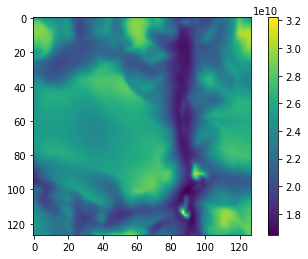

In [56]:
# norm_images = os.listdir('../../Data/UNetData_MURaM/norm_images/')
# im = np.load(f'../../Data/UNetData_MURaM/norm_images/{norm_images[0]}')
# plt.imshow(im)
# plt.colorbar()

# all_muram_norm_npy = [f"../../Data/UNetData_MURaM/norm_images/{f}" for f in os.listdir("../../Data/UNetData_MURaM/norm_images") if '.npy' in f] + [f"../../Data/UNetData_MURaM/norm_images/train/{f}" for f in os.listdir("../../Data/UNetData_MURaM/norm_images/train")] + [f"../../Data/UNetData_MURaM/norm_images/val/{f}" for f in os.listdir("../../Data/UNetData_MURaM/norm_images/val")]
# for file in all_muram_norm_npy:
#     im = np.load(f'{file}')
#     if np.nanmin(im) < 0 or np.nanmax(im) > 1:
#         print(f'File {file} is not properly normalized')
   
norm_imgsets = os.listdir('../../Data/UNetData_MURaM_TSeries40/norm_images/train/')
imset = np.load(f'../../Data/UNetData_MURaM_TSeries40/norm_images/train/{norm_imgsets[0]}')
plt.imshow(imset[1])
plt.colorbar()



#### Median filtering

In [ ]:

'''
Now make med8 
'''

# os.mkdir(f'{unetdata_dir}med8_images'); os.mkdir(f'{unetdata_dir}med8_images/train')
# for img in os.listdir(f'{unetdata_dir}images/train/'):
#     # data = np.load(f'{unetdata_dir}images/train/{img}') # data = (data - np.nanmin(data))/(np.nanmax(data) - np.nanmin(data))
#     data = np.load(f'{unetdata_dir}norm_images/train/{img}') # why was I using non-norm and then normalizing individual image? isnt that what I was tyring to aviod???
#     med = sndi.median_filter(data, size=8)
#     name = f'med8_{img}'
#     np.save(f'{unetdata_dir}/med8_images/train/{name}', med)

'''
Test that med and med residual looks usefull
'''
# imgs = os.listdir(f'{unetdata_dir}norm_images/train/')
# meds = os.listdir(f'{unetdata_dir}med8_images/train/')
# fig, axs = plt.subplots(5, 3, figsize=(15, 25))
# for i in range(5):
#     idx = np.random.randint(0, 100)
#     img = np.load((f'{unetdata_dir}norm_images/train/{imgs[idx]}'))
#     med = np.load((f'{unetdata_dir}med8_images/train/{meds[idx]}'))
#     im = axs[i,0].imshow(img, vmin=0, vmax=1); plt.colorbar(im, ax = axs[i,0])
#     im = axs[i,1].imshow(med, vmin=0, vmax=1); plt.colorbar(im, ax = axs[i,1])
#     im = axs[i,2].imshow(img-med, vmin=0, vmax=1); plt.colorbar(im, ax = axs[i,2])#, vmin=0, vmax=1)
# a=b

#### Check final datasets and dataloaders

In [ ]:
'''
Check that MURaM datasets match up looks ok
'''
trnimgs = os.listdir('../../Data/UNetData_MURaM/images/train')

# They do match up
n = 5
idxs = np.random.choice(np.linspace(0, len(trnimgs)-1, len(trnimgs)-1, dtype=int),n)
fig, axs = plt.subplots(n, 3, figsize=(10, n*3))
for i in range(n):
    img = np.load(f'../../Data/UNetData_MURaM/images/train/{trnimgs[idxs[i]]}')
    mag = np.load(f'../../Data/UNetData_MURaM/mag_images/train/{trnimgs[idxs[i]]}')
    seg = np.load(f'../../Data/UNetData_MURaM/seg_images/train/SEG_{trnimgs[idxs[i]]}')
    axs[i,0].imshow(img)
    axs[i,1].imshow(mag)
    axs[i,2].imshow(seg)
    print(f'img {img.shape}, mag {mag.shape}, seg {seg.shape}')
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)


Searching through 810 images for match
DONE


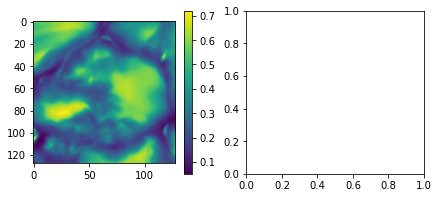

In [11]:
'''
Go through MURaM test set to find image idxs corresponding to MURaM time-series test set image 58
    WHY IS THERE NO MATCH?!?
'''

ts_im_58 = np.load('../../WNet_runs/exp34nm/test_preds_MURaM/x_58.npy')[0] # should really not be sacing test set with each model but oh well
fig, axs = plt.subplots(1,2,figsize=(7, 3)); img = axs[0].imshow(ts_im_58); plt.colorbar(img, ax=axs[0])

# files = os.listdir('../../WNet_runs/exp29nm/test_preds_MURaM/')
# idx = np.random.choice(np.linspace(0,len(files)+1,len(files)+1,dtype=int))
# im = np.load(f'../../WNet_runs/exp29nm/test_preds_MURaM/{files[idx]}')[0]
# print(files[idx])
# img = axs[1].imshow(im); plt.colorbar(img, ax=axs[1])

all_ims = [f for f in os.listdir('../../WNet_runs/exp29nm/test_preds_MURaM') if 'x_' in f]
print(f'Searching through {len(all_ims)} images for match')
for f in all_ims:
    im = np.load(f'../../WNet_runs/exp29nm/test_preds_MURaM/{f}')[0]
    if np.all(im == ts_im_58):
        print(f'Image {f} seems to match')
        plt.figure(); img = plt.imshow(im); plt.colorbar(img)
print('DONE')

From imset 011070to011470_7.npy FOUND middle 011270__7.npy in val
From imset 011070to011470_0.npy FOUND middle 011270__0.npy in val
From imset 007380to007780_8.npy FOUND middle 007580__8.npy in val
From imset 004100to004500_1.npy FOUND middle 004300__1.npy in val
From imset 011070to011470_1.npy FOUND middle 011270__1.npy in val
Timeseries file 011070to011470_7.npy
Middle image is 011270__7.npy which is in val folder in the non-TS set


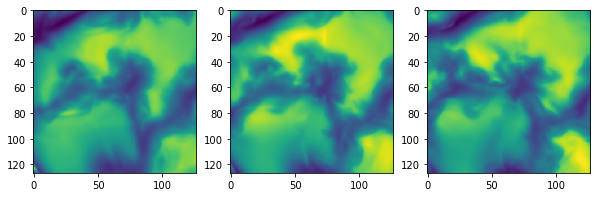

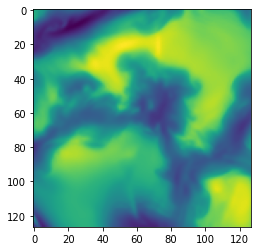

In [15]:
'''
Check that there are matches when pulling directly from data dirs
Yep
'''

val_files = os.listdir('../../Data/UNetData_MURaM/norm_images/val/')
trn_files = os.listdir('../../Data/UNetData_MURaM/norm_images/train/')
all_ts_val_files = os.listdir('../../Data/UNetData_MURaM_TSeries40/norm_images/val/') 
for tsfile in all_ts_val_files:#['000130to005130_0.npy']:
    loc = tsfile[tsfile.find('_')+1:-4]
    # name0 = f"{tsfile[0:tsfile.find('to')]}__{loc}.npy"; name40 = f"{tsfile[tsfile.find('to')+2:-6]}__{loc}.npy"
    # if name0 in val_files:# or name0 in trn_files: #or name40 in val_files or name40 in trn_files:
    #     print(f'From imset {tsfile} FOUND first {name0} in val')# (../../Data/UNetData_MURaM/norm_images/val/{name0} exists = {os.path.exists(f"../../Data/UNetData_MURaM/norm_images/val/{name0}")})')
    name_mid =  f"{str((int(tsfile[0:tsfile.find('to')])+200)).zfill(6)}__{loc}.npy"
    if name_mid in val_files:# or name0 in trn_files: #or name40 in val_files or name40 in trn_files:
        print(f'From imset {tsfile} FOUND middle {name_mid} in val')
        
'''
Check for one image set
'''
# all_ts_val_files = [os.listdir('../../Data/UNetData_MURaM_TSeries40/norm_images/val/')
# idx = np.random.choice(np.linspace(0,len(all_ts_val_files)-1,len(all_ts_val_files)-1,dtype=int))
tsfile = '011070to011470_7.npy' # all_ts_val_files[1]
tsim = np.load(f'../../Data/UNetData_MURaM_TSeries40/norm_images/val/{tsfile}')
fig, axs = plt.subplots(1, 3, figsize=(10,3))
axs[0].imshow(tsim[0]); axs[1].imshow(tsim[20]); axs[2].imshow(tsim[40])
loc = tsfile[tsfile.find('_')+1:-4]
name_mid =  f"{str((int(tsfile[0:tsfile.find('to')])+200)).zfill(6)}__{loc}.npy"
print(f'Timeseries file {tsfile}')

if os.path.exists(f'../../Data/UNetData_MURaM/norm_images/val/{name_mid}'): folder0 = 'val'
elif os.path.exists(f'../../Data/UNetData_MURaM/norm_images/train/{name_mid}'): folder0 = 'train'
else: folder0 = 'NO'
print(f'Middle image is {name_mid} which is in {folder0} folder in the non-TS set')

mid_image = np.load(f'../../Data/UNetData_MURaM/norm_images/{folder0}/{name_mid}')
plt.figure(); plt.imshow(mid_image)

True
Image exp29nm/test_preds_MURaM/x_439.npy matches UNetData_MURaM/norm_images/val/011270__7.npy


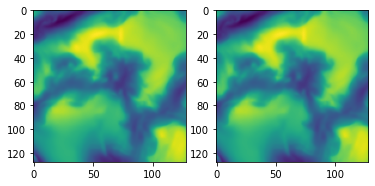

In [4]:
'''
So above TS set has target image that has a corresponding non-TS image
Lets find what idx these are in TS and non-TS test loaders - WHY IS IT NOT IN TS SET???
'''
import torchvision.transforms as transforms
resize = transforms.Resize(128, antialias=None)

# Load 011270__7.npy from non-TS set 
mid_image = np.load(f'../../Data/UNetData_MURaM/norm_images/val/011270__7.npy')
mid_image = mid_image.newbyteorder().byteswap() 
mid_image = np.array(resize(torch.from_numpy(np.expand_dims(mid_image, axis=0)))).squeeze() # to mock data loader

# # Load 011270__7.npy from the middle of TS set 011070to011470_7.npy
# tsim = np.load(f'../../Data/UNetData_MURaM_TSeries40/norm_images/val/011070to011470_7.npy')
# mid_image2 = tsim[2] #; mid_image = mid_image.newbyteorder().byteswap() 
# mid_image2 = np.array(resize(torch.from_numpy(np.expand_dims(mid_image, axis=0)))).squeeze() # to mock data loader
# print(np.all(mid_image == mid_image2))

all_files = [f for f in os.listdir('../../WNet_runs/exp29nm/test_preds_MURaM') if 'x_' in f]
for f in all_files:
    im = np.load(f'../../WNet_runs/exp29nm/test_preds_MURaM/{f}')[0]
    if np.all(im == mid_image):
        print(f'Image exp29nm/test_preds_MURaM/{f} matches UNetData_MURaM/norm_images/val/011270__7.npy')
        fig, axs = plt.subplots(1, 2)
        axs[0].imshow(mid_image); axs[1].imshow(im)

all_sets = [f for f in os.listdir('../../WNet_runs/exp34nm/test_preds_MURaM') if 'x_' in f]
for f in all_sets:
    im = np.load(f'../../WNet_runs/exp34nm/test_preds_MURaM/{f}')[2]
    found = False
    if np.all(im == mid_image):
        found = True
        print(f'Middle image of exp34nm/test_preds_MURaM/{f} matches UNetData_MURaM/norm_images/val/011270__7.npy')
        fig, axs = plt.subplots(1, 2)
        axs[0].imshow(mid_image); axs[1].imshow(im)
    if found = False:
        print(f'Middle image of exp34nm/test_preds_MURaM/{f} does not match any image in UNetData_MURaM/norm_images/val/')


FOUND: seg from TS test set true_15.npy matches non-TS test set seg true_439.npy
FOUND: seg from TS test set true_43.npy matches non-TS test set seg true_679.npy
FOUND: seg from TS test set true_60.npy matches non-TS test set seg true_611.npy
FOUND: seg from TS test set true_108.npy matches non-TS test set seg true_692.npy
FOUND: seg from TS test set true_68.npy matches non-TS test set seg true_274.npy


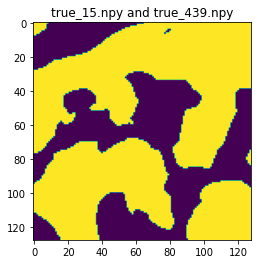

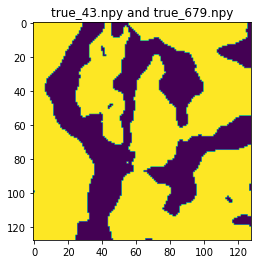

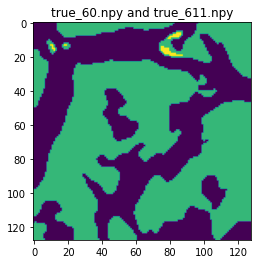

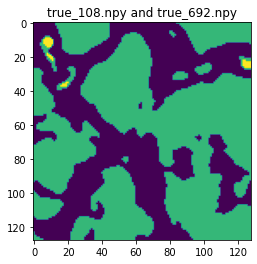

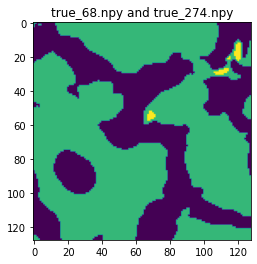

In [43]:
'''
Try picking TS set that has good targ image, then finding that in non-TS val set?
And lets try matching alg segs in case I have a normalization error or something
'''
# good_TS_set = '../../WNet_runs/MURaM/WNetT_1A/test_preds_MURaM/x_58.npy'
# good_TS_img = np.squeeze(np.load(good_TS_set))[2]

all_TSfiles = [f for f in os.listdir('../../WNet_runs/MURaM/WNetT_1A/test_preds_MURaM/') if 'true_' in f]# all_TS_sets = [f for f in os.listdir('../../WNet_runs/MURaM/WNetT_1A/test_preds_MURaM/') if 'x_' in f]
all_files = [f for f in os.listdir('../../WNet_runs/MURaM/WNetX_1A/test_preds_MURaM') if 'true_' in f]
for s in all_TSfiles: #all_TS_sets:
    ts_im = np.squeeze(np.load(f'../../WNet_runs/MURaM/WNetT_1A/test_preds_MURaM/{s}')) #ts_set = np.squeeze(np.load(f'../../WNet_runs/MURaM/WNetT_1A/test_preds_MURaM/{s}'))
    for f in all_files:
        im = np.squeeze(np.load(f'../../WNet_runs/MURaM/WNetX_1A/test_preds_MURaM/{f}'))
        #fig, axs = plt.subplots(1, 2); tsim = axs[0].imshow(ts_im); plt.colorbar(tsim, ax=axs[0]); im = axs[1].imshow(im); plt.colorbar(im, ax=axs[1]); a=b
        if np.all(im == ts_im):
            print(f'FOUND: seg from TS test set {s} matches non-TS test set seg {f}')
            plt.figure(); plt.imshow(im); plt.title(f'{s} and {f}')


False
False
True
[0.14619401 0.14816968 0.22745378 ... 0.17262161 0.3854456  0.4868008 ]
[0.146194   0.14816967 0.22745377 ... 0.1726216  0.38544556 0.48680082]


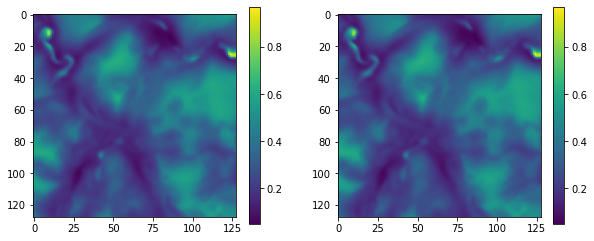

In [41]:
'''
Ok so TS seg WNetT_1A/test_preds_MURaM/true_108.npy matches non-TS seg WNetX_1A/test_preds_MURaM/true_692.npy
    and TS seg WNetT_1A/test_preds_MURaM/true_68.npy matches non-TS seg WNetX_1A/test_preds_MURaM/true_274.npy
Why don't the corresponding targ imgs match?
    Oh... they do but there's just like rounding errors or something
'''

ts_targim = np.squeeze(np.load('../../WNet_runs/MURaM/WNetT_1A/test_preds_MURaM/x_108.npy'))[2]
nonts_im = np.squeeze(np.load('../../WNet_runs/MURaM/WNetX_1A/test_preds_MURaM/x_692.npy')) 
print(np.all(ts_targim == nonts_im))
print((ts_targim == nonts_im).all())
print(np.sum(ts_targim) == np.sum(nonts_im))
diff_idx = np.where(ts_targim != nonts_im)
print(ts_targim[diff_idx])
print(nonts_im[diff_idx])

fig, axs = plt.subplots(1,2, figsize=(10,4))
tsim = axs[0].imshow(ts_targim); plt.colorbar(tsim, ax=axs[0])
im = axs[1].imshow(nonts_im); plt.colorbar(im, ax=axs[1])

#### MISC

In [12]:
'''
Create UNetData_v2_subset/seg_images_binary anologous to UNetData_v2_subset/seg_images
'''

# dir = "../Data/UNetData_v2_subset/"
# for file in os.listdir(f'{dir}seg_images/train/'):
#     if os.path.exists(f'{dir}seg_images_binary/train/{file}') == False:
#         seg = np.load(f'{dir}seg_images/train/{file}')
#         binseg = funclib.convert_back(seg, to='binary')
#         np.save(f'{dir}seg_images_binary/train/{file}', binseg)
# for file in os.listdir(f'{dir}seg_images/val/'):
#     if os.path.exists(f'{dir}seg_images_binary/val/{file}') == False:
#         seg = np.load(f'{dir}seg_images/val/{file}')
#         binseg = funclib.convert_back(seg, to='binary')
#         np.save(f'{dir}seg_images_binary/val/{file}', binseg)

'\nCreate UNetData_v2_subset/seg_images_binary anologous to UNetData_v2_subset/seg_images\n'

In [ ]:
'''
Going back to using just first light, but lets also do it on only 3 classes. 
Create UNetData_v2_subset/seg_images_ternary anologous to UNetData_v2_subset/seg_images
'''

# dir = "../Data/UNetData/"
# for file in os.listdir(f'{dir}seg_images/train/'):
#     if os.path.exists(f'{dir}seg_images_ternary/train/{file}') == False:
#         seg = np.load(f'{dir}seg_images/train/{file}')
#         triseg = funclib.convert_back(seg, to='ternary')
#         np.save(f'{dir}seg_images_ternary/train/{file}', triseg)
# for file in os.listdir(f'{dir}seg_images/val/'):
#     if os.path.exists(f'{dir}seg_images_ternary/val/{file}') == False:
#         seg = np.load(f'{dir}seg_images/val/{file}')
#         triseg = funclib.convert_back(seg, to='ternary')
#         np.save(f'{dir}seg_images_ternary/val/{file}', triseg)

In [ ]:
d = json.load(open('../exp_file.json','rb'))
print(d['randomSharp'])
if d['randomSharp'] == False: print('yes, its false')

In [10]:
'''
Move exp dicts from exp_dict.json to seperate files for all nm models
'''
import json


# d = {"WNet_name": "WNet31nm",
#     "n_classes": 3,
#     "channels": ["X","median_residual"],
#     "weights": [1,1],
#     "img_dir": "../Data/UNetData_MURaM/norm_images/",
#     "seg_dir": "../Data/UNetData_MURaM/seg_images/",
#     "img_size": 128,
#     "randomSharp": "False",
#     "smooth_loss": "True",
#     "blob_loss": "False",
#     "smooth_wght": 10,
#     "blob_wght": 0,
#     "ncut_wght": 1,
#     "padding_mode": "reflect",
#     "num_epochs": 10, 
#     "num_sup": 0, 
#     "freeze_dec": "False",
#     "batch_size": 16,
#     "learning_rate": 0.1}
# json.dump(d, open('../../WNet_runs/exp31nm/exp_file.json','w'))

d = {
  "WNet_name": "WNet32nm",
  "n_classes": 3,
  "channels": [
   "X",
   "median_residual"
  ],
  "weights": [
   1,
   1
  ],
  "img_dir": "../Data/UNetData_MURaM/norm_images/",
  "seg_dir": "../Data/UNetData_MURaM/seg_images/",
  "img_size": 128,
  "randomSharp": "False",
  "smooth_loss": "True",
  "blob_loss": "False",
  "smooth_wght": 10,
  "blob_wght": 0,
  "ncut_wght": 1,
  "padding_mode": "replicate",
  "num_epochs": 10,
  "num_sup": 0,
  "freeze_dec": "False",
  "batch_size": 16,
  "learning_rate": 0.1
 }
json.dump(d, open('../../WNet_runs/exp32nm/exp_file.json','w'))

# d = {"WNet_name": "WNet33nm",
#     "n_classes": 3,
#     "channels": ["X"],
#     "weights": [1],
#     "img_dir": "../Data/UNetData_MURaM/norm_images/",
#     "seg_dir": "../Data/UNetData_MURaM/seg_images/",
#     "img_size": 128,
#     "randomSharp": "False",
#     "smooth_loss": "True",
#     "blob_loss": "False",
#     "smooth_wght": 10,
#     "blob_wght": 0,
#     "ncut_wght": 1,
#     "padding_mode": "replicate",
#     "num_epochs": 10, 
#     "num_sup": 0, 
#     "freeze_dec": "False",
#     "batch_size": 16,
#     "learning_rate": 0.1}
# json.dump(d, open('../../WNet_runs/exp33nm/exp_file.json','w'))

d = {
    "WNet_name": "WNet34nm",
    "n_classes": 3,
    "channels": ["timeseries40_5"],
    "weights": [1,1,1,1,1],
    "img_dir": "../Data/UNetData_MURaM_TSeries40/norm_images/",
    "seg_dir": "../Data/UNetData_MURaM_TSeries40/seg_images/",
    "img_size": 128,
    "randomSharp": "False",
    "smooth_loss": "True",
    "blob_loss": "False",
    "smooth_wght": 10,
    "blob_wght": 0,
    "ncut_wght": 1,
    "padding_mode": "replicate",
    "num_epochs": 10, 
    "num_sup": 0, 
    "freeze_dec": "False",
    "batch_size": 16,
    "learning_rate": 0.1
 }
json.dump(d, open('../../WNet_runs/exp34nm/exp_file.json','w'))
